In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import parser 
import reverser

In [116]:
# cuts = [1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]
# parser.cutting_routine(cuts)
# reverser.reverser_routine(cuts)

In [117]:
# Path to your file
file_path = "decays_PDG2016Plus_massorder_original.dat"
# file_path = "decays_QM2016Plus_massorder.dat"

# Parse the file
particles_df, decays_df = parser.parse_to_df(file_path)

stable_particles_test = particles_df[particles_df["Width (GeV)"] == 0.0]
stable_particles = stable_particles_test[stable_particles_test["No. of decay channels"] == 1]["ID"].tolist()
print(f"Number of stable particles: {len(stable_particles)}")
print(f"Stable particles IDs: {stable_particles}")

Number of stable particles: 26
Stable particles IDs: [3334, -3334, 3312, -3312, 3322, -3322, 3112, -3112, 3212, -3212, 3222, -3222, 3122, -3122, 2112, -2112, 2212, -2212, 311, -311, 321, -321, 211, -211, 111, 22]


In [118]:
# View the data
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set display width
pd.set_option("display.max_colwidth", None)  # Set max column width

print("Particles DataFrame:")
print(particles_df.head(n=3))
print()
print(f"total number of particles : {len(particles_df)}")

print("\nDecays DataFrame:")
print(decays_df.head(n=3))
print()
print(f"total number of decays : {len(decays_df)}")


Particles DataFrame:
        ID          Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels
0  2001034  Delta(2950)-        2.95          0.5          16           1                0          0           0      1.5      -1                      2
1  2001033  Delta(2950)0        2.95          0.5          16           1                0          0           0      1.5       0                      3
2  2001032  Delta(2950)+        2.95          0.5          16           1                0          0           0      1.5       1                      3

total number of particles : 739

Decays DataFrame:
   ParentID  No. of daughter particles  BranchingRatio              ProductIDs
0   2001034                          2            0.96  [2001030, 22, 0, 0, 0]
1   2001034                          2            0.04   [2112, -211, 0, 0, 0]
2   2001033                          2            0.96  [2001029, 22, 0, 0

## TEST of dpg API

In [119]:
import pdg
api = pdg.connect()
print(api)

2025 Review of Particle Physics, data release 2025-05-30 13:30:23 PDT, API version 0.2.0
S. Navas et al. (Particle Data Group), Phys. Rev. D 110, 030001 (2024) and 2025 update
(C) Particle Data Group (PDG), data released under CC BY 4.0
For further information see https://pdg.lbl.gov/api


In [120]:
particle = api.get_particle_by_mcid(211)  # Example: get the particle with ID 211 (pi+)
mass = list(particle.masses())

mass[0].summary_values()
mass[0].value  # Get the mass value
mass[0].error  # Get the uncertainty of the mass

0.00018200716040826

In [ ]:
mass_errors = []
width_errors = []
counter_not_found = 0
for mcid in particles_df["ID"]:
    try :
        particle = api.get_particle_by_mcid(mcid)
    except:
        mass_errors.append(np.nan)
        width_errors.append(np.nan)
        counter_not_found += 1
        continue

    try:
        mass_errors.append(particle.mass_error)
        width_errors.append(particle.width_error)
    except:
        ### ToDO : Handle the case where mass or width is not available check if no mass or width is really found
        mass_errors.append(np.nan)
        width_errors.append(np.nan)

print(mass_errors)
print()
print(width_errors)


def replace_nan_none(input_list, default_value=0.0):
    """
    Replaces all None and np.nan values in a list with -1.
    
    Parameters:
        input_list (list): List containing numbers, None, or np.nan.

    Returns:
        list: A new list with None and np.nan replaced by -1.
    """
    counter = 0
    for i in range(len(input_list)):
        if input_list[i] is None or np.isnan(input_list[i]):
            counter += 1
    
    print(f"Replaced {counter} None or np.nan values with {default_value}.")

    return [default_value if x is None or np.isnan(x) else x for x in input_list]

mass_errors = replace_nan_none(mass_errors, default_value=-0.2)
width_errors = replace_nan_none(width_errors, default_value=-0.2)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, None, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, None, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, None, None, None, None, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, None, None, nan, nan, nan, nan, nan, nan, None, None, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

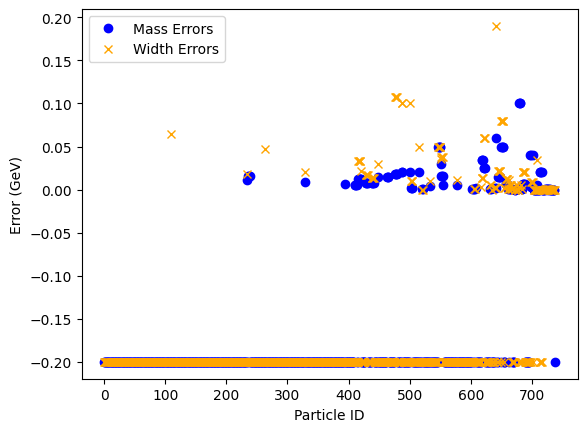

In [122]:
plt.plot(mass_errors, label="Mass Errors", color='blue', linestyle='', marker='o')
plt.plot(width_errors, label="Width Errors", color='orange', linestyle='', marker='x')
plt.xlabel("Particle ID")
plt.ylabel("Error (GeV)")
plt.legend()
plt.show()

In [123]:
mass_errors = []
width_errors = []
counter_not_found = 0
for mcid in particles_df["ID"]:
    try :
        particle = api.get_particle_by_mcid(mcid)
    except:
        mass_errors.append(np.nan)
        width_errors.append(np.nan)
        counter_not_found += 1
        continue

    try:
        mass_errors.append(particle.mass_error)
        width_errors.append(particle.width_error)
    except:
        mass_errors.append(np.nan)
        width_errors.append(np.nan)

mass_errors_df = replace_nan_none(mass_errors)
width_errors_df = replace_nan_none(width_errors)

Replaced 596 None or np.nan values with 0.0.
Replaced 613 None or np.nan values with 0.0.


In [124]:
particles_df_errors = particles_df.copy()
particles_df_errors["Mass Error (MeV)"] = mass_errors_df
particles_df_errors["Width Error (MeV)"] = width_errors_df

In [125]:
print("Particles DataFrame:")
print(particles_df_errors.head(n=3))
print()
print(f"total number of particles : {len(particles_df_errors)}")

Particles DataFrame:
        ID          Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels  Mass Error (MeV)  Width Error (MeV)
0  2001034  Delta(2950)-        2.95          0.5          16           1                0          0           0      1.5      -1                      2               0.0                0.0
1  2001033  Delta(2950)0        2.95          0.5          16           1                0          0           0      1.5       0                      3               0.0                0.0
2  2001032  Delta(2950)+        2.95          0.5          16           1                0          0           0      1.5       1                      3               0.0                0.0

total number of particles : 739


In [126]:
# Output path
# output_path = f"test/decays_PDG2016Plus_massorder_{cut}.dat"

# parser.parse_to_dat(output_path, particles_df, decays_df)